# Assignment 2: Linear Models and Validation Metrics (30 marks total)
### Due: October 10 at 11:59pm

### Name: 

### In this assignment, you will need to write code that uses linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

## Part 1: Classification (14.5 marks total)

You have been asked to develop code that can help the user determine if the email they have received is spam or not. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 0: Import Libraries

In [2]:
import numpy as np
import pandas as pd

### Step 1: Data Input (1 mark)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/spam.html

Use the yellowbrick function `load_spam()` to load the spam dataset into the feature matrix `X` and target vector `y`.

Print the size and type of `X` and `y`.

In [3]:
# TO DO: Import spam dataset from yellowbrick library
from yellowbrick.datasets import load_spam

X, y = load_spam()
# TO DO: Print size and type of X and y

# print("Size of X: ", X.shape)
# print("Type of X: ", type(X))
# print("Size of y: ", y.shape)
# print("Type of y: ", type(y))

print("\nThe size and type(s) of X: \n") 
print(X.shape)
print(X.dtypes)
print("\nThe size and type(s) of Y: \n")
print(y.shape)
print(y.dtypes)



The size and type(s) of X: 

(4600, 57)
word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq

### Step 2: Data Processing (1.5 marks)

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values.

In [4]:
# TO DO: Check if there are any missing values and fill them in if necessary

missing_x_values = X.isna().sum()
missing_y_values = y.isna().sum()


print("", missing_x_values)
print("", missing_y_values)

# No missing values, proceed

 word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fr

For this task, we want to test if the linear model would still work if we used less data. Use the `train_test_split` function from sklearn to create a new feature matrix named `X_small` and a new target vector named `y_small` that contain **5%** of the data.

In [5]:
# TO DO: Create X_small and y_small 

from sklearn.model_selection import train_test_split

# Take 5% of the dataset and then split into 80-20 for training and testing


X_small, _, y_small, _ = train_test_split(X, y, train_size = 0.05, random_state = 42)

X_small, X_small_test, y_small, y_small_test = train_test_split(X_small, y_small, test_size = 0.2, random_state = 42)

print(X_small.shape)
print(X_small_test.shape)

(184, 57)
(46, 57)


### Step 3: Implement Machine Learning Model

1. Import `LogisticRegression` from sklearn
2. Instantiate model `LogisticRegression(max_iter=2000)`.
3. Implement the machine learning model with three different datasets: 
    - `X` and `y`
    - Only first two columns of `X` and `y`
    - `X_small` and `y_small`

### Step 4: Validate Model

Calculate the training and validation accuracy for the three different tests implemented in Step 3

### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Data size, training accuracy, validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [6]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

from sklearn.linear_model import LogisticRegression

# Instantiating model
model = LogisticRegression(max_iter=2000)

# ALL THE DATA, with an 80-20 train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_all = LogisticRegression(max_iter=2000)
model_all.fit(X_train, y_train)

# Training set and validation for entire dataset

train_all_score = model_all.score(X_train, y_train)
valid_all_score = model_all.score(X_test, y_test)

# Using the first two columns and an 80-20 train-test split
# Short stands for shortened here

X_short = X.iloc[:, :2]

X_short_train, X_short_test, y_short_train, y_short_test = train_test_split(X_short, y, test_size=0.2, random_state=42)

model_short = LogisticRegression(max_iter=2000)
model_short.fit(X_short_train, y_short_train)

train_short_score = model_short.score(X_short_train, y_short_train)
valid_short_score = model_short.score(X_short_test, y_short_test)

# Using only 5% of the data now

model_small = LogisticRegression(max_iter=2000)
model_small.fit(X_small, y_small)

train_small_score = model_small.score(X_small, y_small)
valid_small_score = model_small.score(X_small_test, y_small_test)

# Creating a dataframe to store the results

data = {'Data Size': [X_train.shape, X_short_train.shape, X_small.shape],
            'Training Accuracy': [train_all_score, train_short_score, train_small_score],
            'Validation Accuracy': [valid_all_score, valid_short_score, valid_small_score]}
results = pd.DataFrame(data)
results


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,Data Size,Training Accuracy,Validation Accuracy
0,"(3680, 57)",0.934239,0.908696
1,"(3680, 2)",0.620109,0.589130
2,"(184, 57)",0.961957,0.891304


### Questions (4 marks)
1. How do the training and validation accuracy change depending on the amount of data used? Explain with values.
2. In this case, what do a false positive and a false negative represent? Which one is worse?

*YOUR ANSWERS HERE*

1. The training and validation scores are clearly impacted by the amount of data used. In the previous example it is clear that using a smaller data size with little to no y-values to allow the model to be properly trained amounts in an underfit model. Specifically using (3680, 57) which is the whole dataset vs (3680, 2) which is the truncated version of the original results in a training score of 93.4% vs 62% and a validation score of 90.8% vs 58.9%. It is clear that there are not enough y-values to produce a useful model. Using the last row in the above table, we see a training score of 96.2% and a valdiation score of 89.1%, but without ample amounts of data it is likely that the model is being overfit. 

2. A false positive in this case represents the model determining there is spam when it is not. A false negative represents the model determining there is no spam and allowing it to pass. It is clear that not allowing legitimate emails and sending them to spam is worse because important emails such as banking, school, personal items could be missed. 

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. The source was based off the Linear Example-filled.ipynb that was provided to us in Lecture. The steps were naturally very similar and allowed me to closely follow along to achieve the aim of the first exercise. 
2. I completed the steps in the order they were provided in the notebook, this helped me keep track of the steps already completed.
3. Generative AI was used for the first exercise to find the proper referencing in order to create a new panda's dataframe with all the data I had calculated.
4. Yes I did, my main challenge was remembering the names used and keeping them straight. Otherwise, I would be performing a task on the wrong dataset. I also struggled with the initial splitting of data as I thought the assignment was asking us to use 5% of the data to test and use 95% to train.

## Part 2: Regression (10.5 marks total)

For this section, we will be evaluating concrete compressive strength of different concrete samples, based on age and ingredients. You will need to repeat the steps 1-4 from Part 1 for this analysis.

### Step 1: Data Input (1 mark)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the spam dataset into the feature matrix `X` and target vector `y`.

Print the size and type of `X` and `y`.

In [7]:
# TO DO: Import spam dataset from yellowbrick library

from yellowbrick.datasets import load_concrete

X, y = load_concrete()

# TO DO: Print size and type of X and y

print(X.shape)
X.dtypes
print(y.shape)
y.dtypes

(1030, 8)
(1030,)


dtype('float64')

### Step 2: Data Processing (0.5 marks)

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values.

In [8]:
# TO DO: Check if there are any missing values and fill them in if necessary

missing_x_values = X.isna().sum()
missing_y_values = y.isna().sum()


print("", missing_x_values)
print("", missing_y_values)

 cement    0
slag      0
ash       0
water     0
splast    0
coarse    0
fine      0
age       0
dtype: int64
 0


### Step 3: Implement Machine Learning Model (1 mark)

1. Import `LinearRegression` from sklearn
2. Instantiate model `LogisticRegression(max_iter=2000)`.
3. Implement the machine learning model with `X` and `y`

In [9]:
# TO DO: ADD YOUR CODE HERE
# Note: for any random state parameters, you can use random_state = 0

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instantiate and fit the Linear Regression model
model = LinearRegression().fit(X_train, y_train)

In [10]:
# Fit the model to the training data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

### Step 4: Validate Model (1 mark)

Calculate the training and validation accuracy using mean squared error and R2 score.

In [11]:
# TO DO: ADD YOUR CODE HERE

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Mean squared error for training and test

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# r2 error for training and test

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Training Accuracy mean squared error: ", mse_train)
print("Training Accuracy r squared error: ", r2_train)
print("Validation Accuracy mean squared error: ", mse_test)
print("Validation Accuracy r squared error: ", r2_test)


Training Accuracy mean squared error:  111.35843861132467
Training Accuracy r squared error:  0.6108229424520555
Validation Accuracy mean squared error:  95.90413603680643
Validation Accuracy r squared error:  0.6234144623633329


### Step 5: Visualize Results (1 mark)
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: MSE and R2 score
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [12]:
# TO DO: ADD YOUR CODE HERE

results_data = {
    "MSE": [mse_train, mse_test],
    "R2": [r2_train, r2_test]
}

results = pd.DataFrame(results_data)
print(results)

          MSE        R2
0  111.358439  0.610823
1   95.904136  0.623414


### Questions (2 marks)
1. Did using a linear model produce good results for this dataset? Why or why not?

Using a linear model did not produce good results. This can be seen as there is a high mean squared error value of 111.36 for the training set and 95.90 for the validation set. The R2 values were not much better as results of 0.6108 and 0.6243 were produced, respectively. 

The large MSE shows that the model's predictions are further from the true values and the low R2 value shows there is a large variance between the predicited and actual values that the model is not catching. 


### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. The code was scored from a few different examples that we did in class. Particulary the Linear Regression Example and the Regression Metrics Example. Some of this was also covered in the lab on Oct 2, 2023.
2. I completed the steps in the order they were provided as it allowed us to use the same outline as part one of this assignment and then combine it with the regression metrics stuff we learned in class.
3. I used generative AI because I kept recieving an error about my y_test being 'continuous'. However, switching from VSCode to Jupyter Notebook for the assignment fixed this issue (still not sure what was going wrong). The prompt used was the error code provided to me by VSCode. 
4. I had a few challenges, particularly ensuring that the patterns produced by the exercise were interpreted correctly. This was done by referring back to the in class notes provided by Dr.Dawson.

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


*ADD YOUR FINDINGS HERE*

There are a few observations that we find in the results of using a linear model for this question. 

    - An MSE of 111.35 and 95.9 for the training and testing set, respectively shows there is an overfitting of data occuring. It also shows that the linear model used is not adept for this problem. 
    - The obtained R2 socres of 0.6108 and 0.6243 show there is a large difference between what the model has predicted, hence the model can only explain portions of variance in the data making it not very robust. 
    - Graphing the actual vs predicted line for the model shows there is a major discrepancy and where this large R2 and MSE values are arising from.
    - It is also clear that the model does not consider the possible features accurately, doing so would improve the performance of the mdoel.

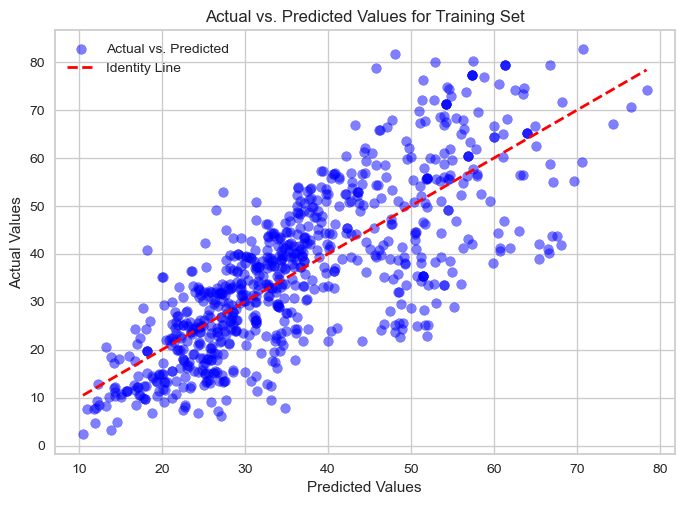

In [13]:
import matplotlib.pyplot as plt

plt.scatter(y_train_pred, y_train, color='blue', label='Actual vs. Predicted', alpha=0.5)

plt.plot([min(y_train_pred), max(y_train_pred)], [min(y_train_pred), max(y_train_pred)], color='red', linestyle='--', lw=2, label='Identity Line')

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Values for Training Set')
plt.legend(loc='best')

# Show the plot
plt.show()


## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

What I liked: I really enjoyed working on the different models and getting a chance to use Linear Regression in real life applications. I found it motivating to see how I can use these examples in industry one day in my career. 

What I disliked: I felt that the instructions were unclear on how to use the 5% in the first part of the assignment. I thought it was a 95-5 split as oppposed to using 5% and splitting that 80-20. I found that very confusing. I also was getting some strange errors so I would recommend telling students to not use thse notes in VSCode. 

## Part 5: Bonus Question (4 marks)

Repeat Part 2 with Ridge and Lasso regression to see if you can improve the accuracy results. Which method and what value of alpha gave you the best R^2 score? Is this score "good enough"? Explain why or why not.

**Remember**: Only test values of alpha from 0.001 to 100 along the logorithmic scale.

In [14]:
# TO DO: ADD YOUR CODE HERE

*ANSWER HERE*

Best Ridge Alpha: 6.13590727341317
Best Ridge R^2 Score: 0.6375969647038755
Best Lasso Alpha: 0.1668100537200059
Best Lasso R^2 Score: 0.6388725682477122


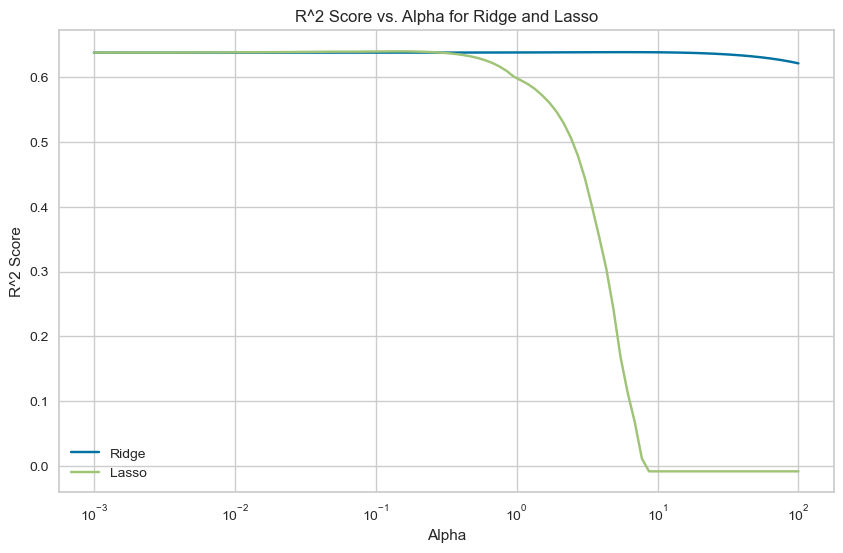

In [21]:
from yellowbrick.datasets import load_concrete

from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

X, y = load_concrete()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alphas = np.logspace(-3, 2, num=100)  # Values of alpha from 0.001 to 100 on a logarithmic scale

ridge_r2_scores = [] # Initializing ridge score array

# Going through to find the optimal R^2 and alpha for ridge regression
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    y_test_pred = ridge.predict(X_test_scaled)
    r2_score_value = r2_score(y_test, y_test_pred)
    ridge_r2_scores.append(r2_score_value)
    
best_alpha_ridge = alphas[np.argmax(ridge_r2_scores)]
best_r2_score_ridge = max(ridge_r2_scores)

print("Best Ridge Alpha:", best_alpha_ridge)
print("Best Ridge R^2 Score:", best_r2_score_ridge)

lasso_r2_scores = [] # Initializing lasso score array

# Going through to find the optimal R^2 and alpha for lasso regression
for alpha in alphas: 
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    y_test_pred = lasso.predict(X_test_scaled)
    r2_score_value = r2_score(y_test, y_test_pred)
    lasso_r2_scores.append(r2_score_value)

best_alpha_lasso = alphas[np.argmax(lasso_r2_scores)]
best_r2_score_lasso = max(lasso_r2_scores)

print("Best Lasso Alpha:", best_alpha_lasso)
print("Best Lasso R^2 Score:", best_r2_score_lasso)

# Plot to show various Alpha's and R^2 Scores of Ridge and Lasso Regression models
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, ridge_r2_scores, label="Ridge")
plt.semilogx(alphas, lasso_r2_scores, label="Lasso")
plt.xlabel("Alpha")
plt.ylabel("R^2 Score")
plt.title("R^2 Score vs. Alpha for Ridge and Lasso")
plt.legend()
plt.show()
